# Сегментация камней

### Разархивация всех данных

In [1]:
!unzip -o "/storage/vskovoroda/Stones/full_dataset.zip" -d "/storage/vskovoroda/Stones/"

Archive:  /storage/vskovoroda/Stones/full_dataset.zip
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/parts45769.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part2.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part1.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part11.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part3.zip  


In [2]:
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/parts45769.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part2.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part1.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part11.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part3.zip" -t "/storage/vskovoroda/Stones/"

In [3]:
!rm -d "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions"
!mkdir "/storage/vskovoroda/Stones/data/"
!mkdir "/storage/vskovoroda/Stones/data/part1"\
        "/storage/vskovoroda/Stones/data/part2"\
        "/storage/vskovoroda/Stones/data/part3"\
        "/storage/vskovoroda/Stones/data/part4"\
        "/storage/vskovoroda/Stones/data/part5"

mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part1’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part2’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part3’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part4’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part5’: File exists


In [4]:
!unzip -qq -o "/storage/vskovoroda/Stones/part1.zip" -d "/storage/vskovoroda/Stones/data/part1"
!unzip -qq -o "/storage/vskovoroda/Stones/part2.zip" -d "/storage/vskovoroda/Stones/data/part2"
!unzip -qq -o "/storage/vskovoroda/Stones/part3.zip" -d "/storage/vskovoroda/Stones/data/part3"
!unzip -qq -o "/storage/vskovoroda/Stones/part11.zip" -d "/storage/vskovoroda/Stones/data/part4"
!unzip -qq -o "/storage/vskovoroda/Stones/parts45769.zip" -d "/storage/vskovoroda/Stones/data/part5"

In [5]:
!rm "/storage/vskovoroda/Stones/part1.zip"
!rm "/storage/vskovoroda/Stones/part2.zip"
!rm "/storage/vskovoroda/Stones/part3.zip"
!rm "/storage/vskovoroda/Stones/part11.zip"
!rm "/storage/vskovoroda/Stones/parts45769.zip"

### Импорт всех необходимых библиотек

In [6]:
from pycocotools.coco import COCO
import cv2
import os
import json
import numpy as np
import multiprocessing
from fastai.vision.all import *
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
start_dir = "/storage/vskovoroda/Stones/data/"
os.chdir(start_dir)

In [8]:
os.listdir()

['part3', 'part5', 'part4', 'part2', 'part1']

In [10]:
if not os.path.exists('images'):
    os.mkdir('images')
if not os.path.exists('annotations'):
    os.mkdir('annotations')

In [ ]:
os

In [15]:
def make_mask(image):
    global coco, part
    if not os.path.isfile(part + '/images/' + image['file_name']):
        return
    ann_ids = coco.getAnnIds(
                    imgIds = image['id'], 
                    catIds = [1],  # id асбеста
                    iscrowd=None
                )
    anns = coco.loadAnns(ann_ids)
    mask = np.zeros((image['height'],image['width']))
    for ann in anns:
        mask = np.maximum(mask,coco.annToMask(ann))
    cv2.imwrite(start_dir + '/annotations/' + image['file_name'], mask) # сохраняем маску
    os.replace(part + '/images/' + image['file_name'], 'images/' + image['file_name'])

In [16]:
for part in ['part1', 'part2', 'part3', 'part4', 'part5']:
    ann_file = start_dir + part + '/annotations/instances_default.json'
    coco = COCO(ann_file)
    pool_obj = multiprocessing.Pool()
    pool_obj.map(make_mask, list(coco.imgs.values()))
    print(part, 'Done!')

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
part1 Done!
loading annotations into memory...
Done (t=0.35s)
creating index...
index created!
part2 Done!
loading annotations into memory...
Done (t=1.00s)
creating index...
index created!
part3 Done!
loading annotations into memory...
Done (t=0.83s)
creating index...
index created!
part4 Done!
loading annotations into memory...
Done (t=0.35s)
creating index...
index created!
part5 Done!


Process ForkPoolWorker-582:
Process ForkPoolWorker-628:
Process ForkPoolWorker-611:
Process ForkPoolWorker-621:
Process ForkPoolWorker-614:
Process ForkPoolWorker-581:
Process ForkPoolWorker-580:
Process ForkPoolWorker-595:
Process ForkPoolWorker-589:
Process ForkPoolWorker-612:
Process ForkPoolWorker-591:
Process ForkPoolWorker-608:
Process ForkPoolWorker-596:
Process ForkPoolWorker-588:
Process ForkPoolWorker-613:
Process ForkPoolWorker-635:
Process ForkPoolWorker-599:
Process ForkPoolWorker-610:
Process ForkPoolWorker-632:
Process ForkPoolWorker-640:
Process ForkPoolWorker-594:
Process ForkPoolWorker-619:
Process ForkPoolWorker-585:
Process ForkPoolWorker-605:
Process ForkPoolWorker-602:
Process ForkPoolWorker-629:
Process ForkPoolWorker-616:
Process ForkPoolWorker-637:
Process ForkPoolWorker-627:
Process ForkPoolWorker-597:
Process ForkPoolWorker-620:
Process ForkPoolWorker-617:
Process ForkPoolWorker-625:
Process ForkPoolWorker-609:
Process ForkPoolWorker-622:
Process ForkPoolWork

In [18]:
!rm -dr "/storage/vskovoroda/Stones/data/part1"
!rm -dr "/storage/vskovoroda/Stones/data/part2"
!rm -dr "/storage/vskovoroda/Stones/data/part3"
!rm -dr "/storage/vskovoroda/Stones/data/part4"
!rm -dr "/storage/vskovoroda/Stones/data/part5"

In [21]:
path = Path('/storage/vskovoroda/Stones/data')
dls = SegmentationDataLoaders.from_label_func(path = path,
            item_tfms=Resize(2000),
            bs = 5,
            batch_tfms=[Normalize.from_stats(*imagenet_stats), aug_transforms],
            fnames = get_image_files(path/'images'),
            label_func = lambda o: path/'annotations'/o.name,
            codes = ['no_asbest', 'asbest'])

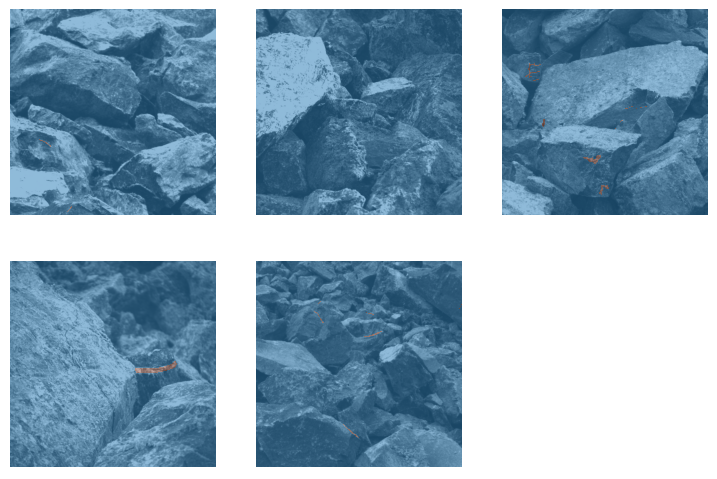

In [27]:
dls.show_batch(max_n=6)

In [28]:
import segmentation_models_pytorch as smp

In [ ]:
model = smp.Unet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=3,                      # model output channels (number of classes in your dataset)
)

In [ ]:
smp.Unet
smp.UnetPlusPlus
smp.MAnet
smp.Linknet
smp.PSPNet
smp.FPN
smp.PAN
smp.DeepLabV3
smp.DeepLabV3Plus

In [9]:
# learner = unet_learner(dls, resnet50, metrcs=accuracy)
learn = unet_learner(dls, resnet34)

/home/vskovoroda/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vskovoroda/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
learn.fit(10)

epoch,train_loss,valid_loss,time
0,7.390676,0.671788,00:22
1,3.031313,0.646121,00:20
2,1.739566,0.640595,00:19
3,1.180953,0.580568,00:19
4,0.895410,0.518434,00:19
5,0.745128,0.538023,00:19
6,0.659185,0.576371,00:19
7,0.603883,0.521982,00:19
8,0.567518,0.561850,00:20
9,0.540553,0.491454,00:20


In [11]:
interp = SegmentationInterpretation.from_learner(learn)

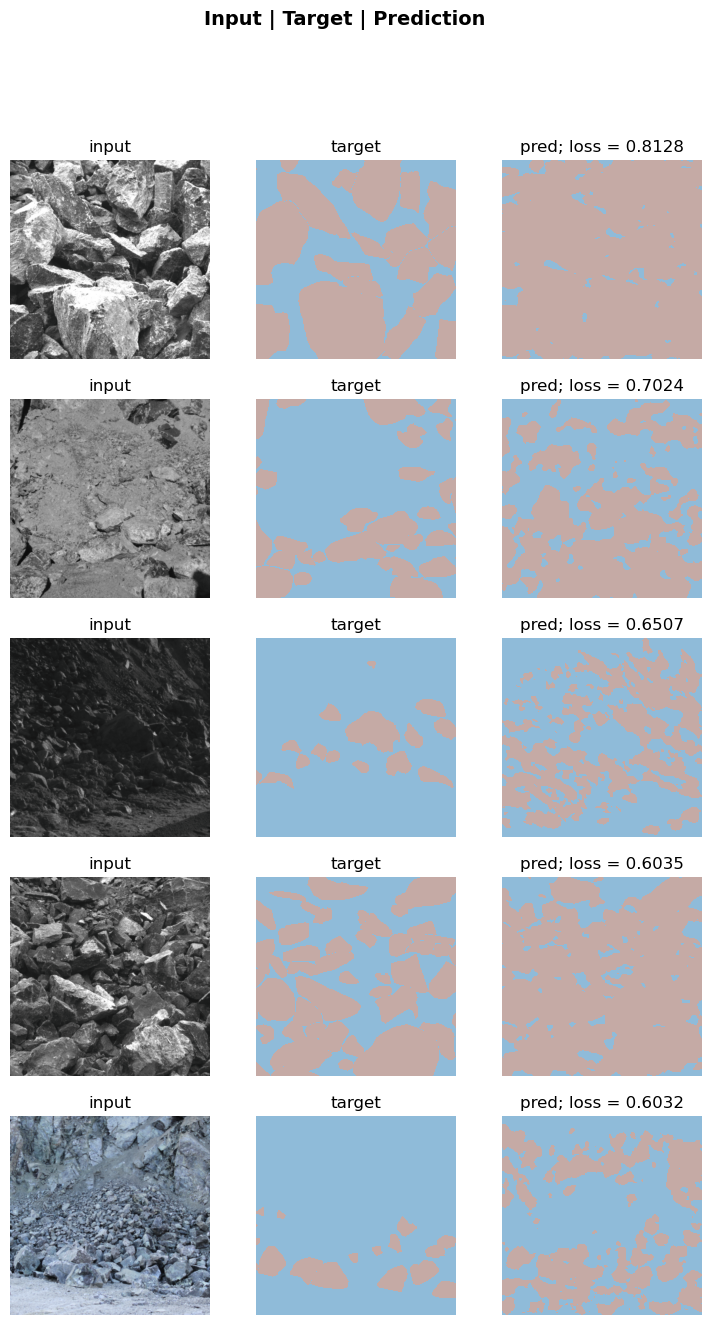

In [12]:
interp.plot_top_losses(k=5)

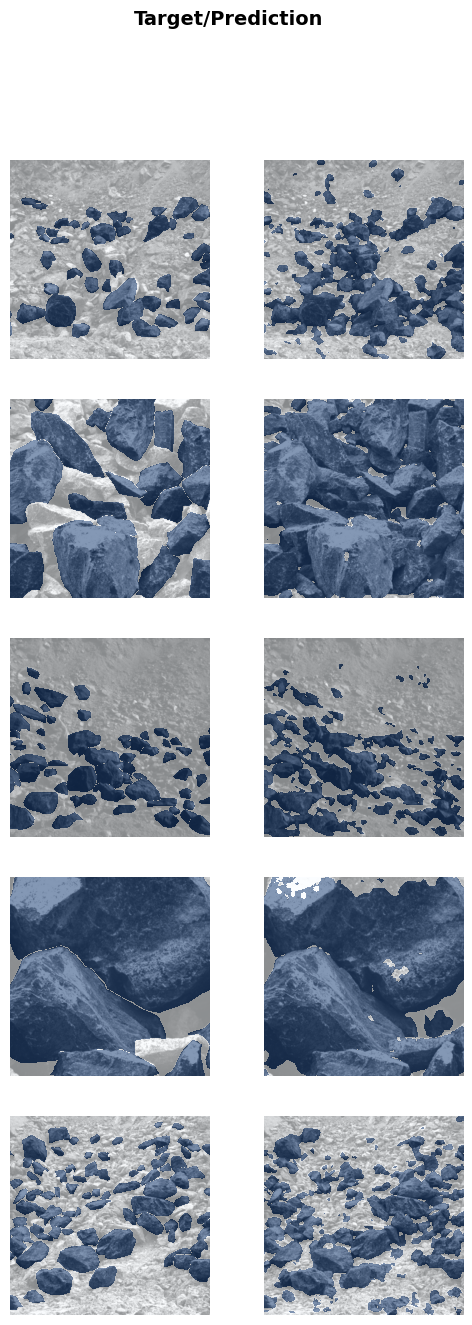

In [13]:
learn.show_results(cmap='Blues', vmin=0, vmax=1)

In [14]:
learn.save('no_blur_10')

Path('data/models/no_blur_10.pth')

In [14]:
learn.load('40blur_7')

In [17]:
path = Path('data')
dls = SegmentationDataLoaders.from_label_func(path = path,
            item_tfms=Resize(600),
            bs = 5,
            batch_tfms=[Normalize.from_stats(*imagenet_stats), aug_transforms],
            fnames = get_image_files(path/'images'),
            label_func = lambda o: get_msk(o), codes = ['no_stone', 'stone'])

In [18]:
learn.dls = dls

In [19]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,time
0,0.904654,0.675507,00:20


epoch,train_loss,valid_loss,time
0,0.622427,0.519079,00:19
1,0.527657,0.459428,00:21


In [22]:
imges_names = (path/'images').ls()
masks_names = (path/'SegmentationClass').ls()

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

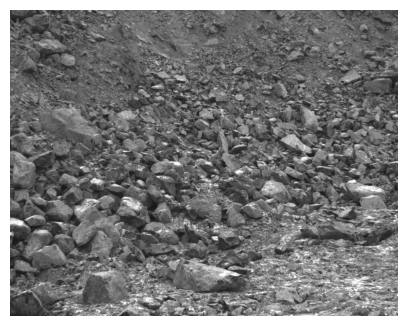

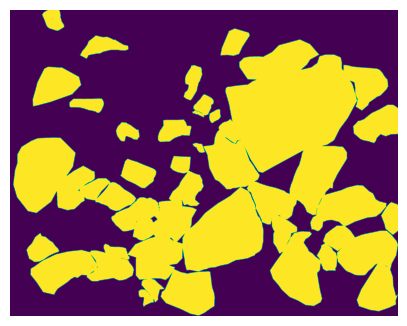

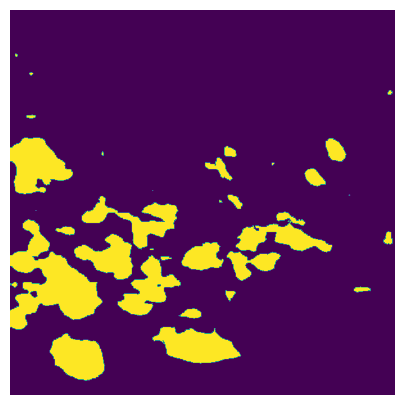

In [23]:
k = 2
img = PILImage.create(imges_names[k])
msk = PILMask.create(masks_names[k])
pred = learn.predict(PILImage.create(imges_names[k]))
show_image(img), show_image(msk), show_image(pred[0])